In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()


Saving Advertising Budget and Sales.csv to Advertising Budget and Sales.csv


In [ ]:
# Load the uploaded CSV file
data = pd.read_csv("Advertising Budget and Sales.csv")

# Show first 5 rows
print("Preview of dataset:")
print(data.head())

# Show shape (rows, columns)
print("\nDataset shape:", data.shape)

# Show column info (names + data types)
print("\nDataset info:")
print(data.info())

# Show basic statistics
print("\nSummary statistics:")
print(data.describe())


Preview of dataset:
   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  

Dataset shape: (200, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null 

In [ ]:
# Dropping the extra index unnecessary column
data = data.drop(columns=["Unnamed: 0"])


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
# Rename columns
data = data.rename(columns={
    "TV Ad Budget ($)": "TV",
    "Radio Ad Budget ($)": "Radio",
    "Newspaper Ad Budget ($)": "Newspaper",
    "Sales ($)": "Sales"
})


In [ ]:
print(data.head())
print("\nShape after cleaning:", data.shape)


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Shape after cleaning: (200, 4)


In [ ]:
print("Average TV spend:", data["TV"].mean())
print("Average Radio spend:", data["Radio"].mean())
print("Average Newspaper spend:", data["Newspaper"].mean())
print("Average Sales:", data["Sales"].mean())


Average TV spend: 147.0425
Average Radio spend: 23.264000000000006
Average Newspaper spend: 30.553999999999995
Average Sales: 14.0225


In [ ]:
print("\nCorrelation with Sales:")
print(data.corr()["Sales"].sort_values(ascending=False))



Correlation with Sales:
Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [ ]:
roi_tv = data["Sales"].sum() / data["TV"].sum()
roi_radio = data["Sales"].sum() / data["Radio"].sum()
roi_newspaper = data["Sales"].sum() / data["Newspaper"].sum()

print("\nSales per $1 spent:")
print("TV:", round(roi_tv, 3))
print("Radio:", round(roi_radio, 3))
print("Newspaper:", round(roi_newspaper, 3))



Sales per $1 spent:
TV: 0.095
Radio: 0.603
Newspaper: 0.459


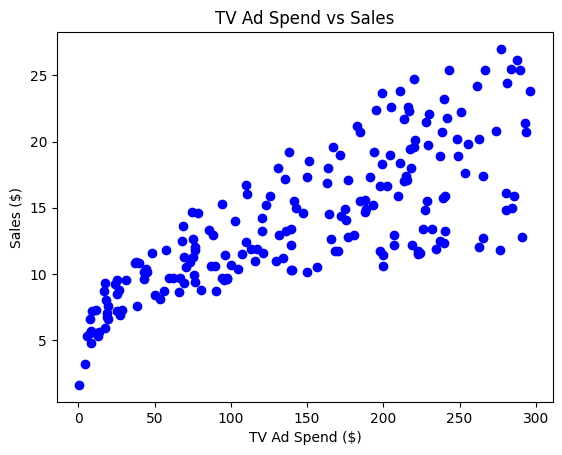

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["TV"], data["Sales"], color="blue")
plt.xlabel("TV Ad Spend ($)")
plt.ylabel("Sales ($)")
plt.title("TV Ad Spend vs Sales")
plt.show()


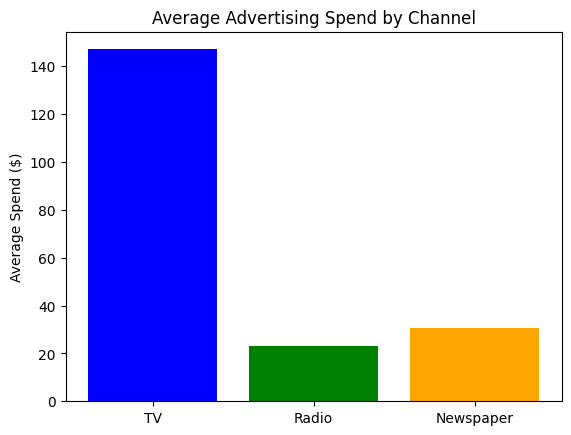

In [ ]:
import matplotlib.pyplot as plt

# Calculate average spend
avg_spend = [data["TV"].mean(), data["Radio"].mean(), data["Newspaper"].mean()]
channels = ["TV", "Radio", "Newspaper"]

plt.bar(channels, avg_spend, color=["blue","green","orange"])
plt.title("Average Advertising Spend by Channel")
plt.ylabel("Average Spend ($)")
plt.show()


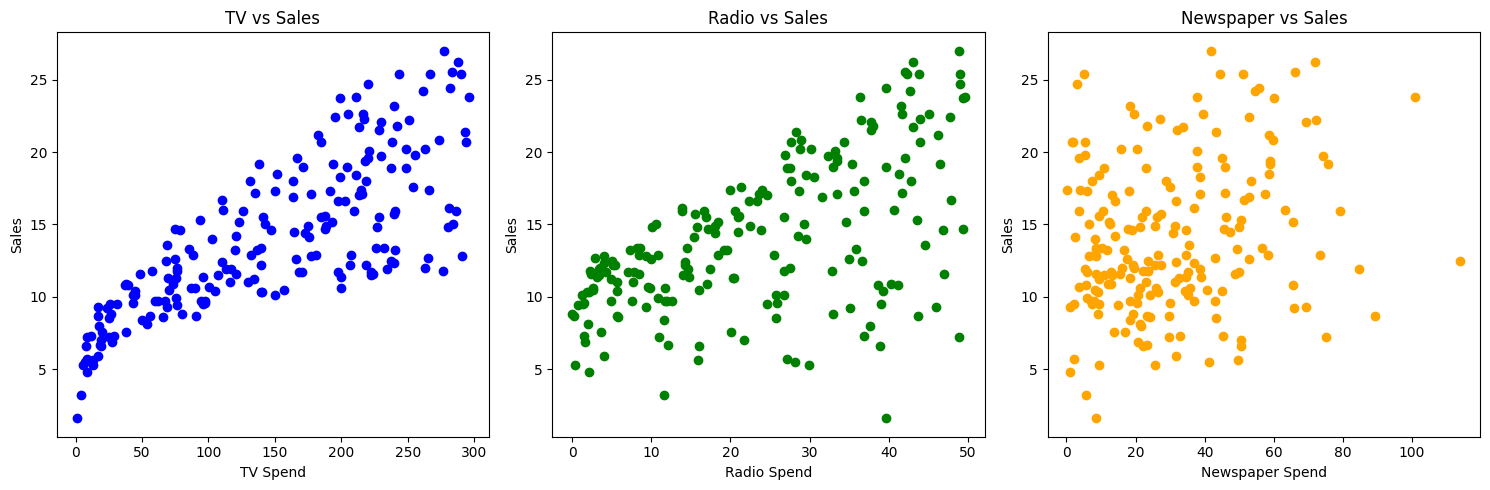

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(data["TV"], data["Sales"], color="blue")
axes[0].set_title("TV vs Sales")
axes[0].set_xlabel("TV Spend")
axes[0].set_ylabel("Sales")

axes[1].scatter(data["Radio"], data["Sales"], color="green")
axes[1].set_title("Radio vs Sales")
axes[1].set_xlabel("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].scatter(data["Newspaper"], data["Sales"], color="orange")
axes[2].set_title("Newspaper vs Sales")
axes[2].set_xlabel("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()
plt.show()


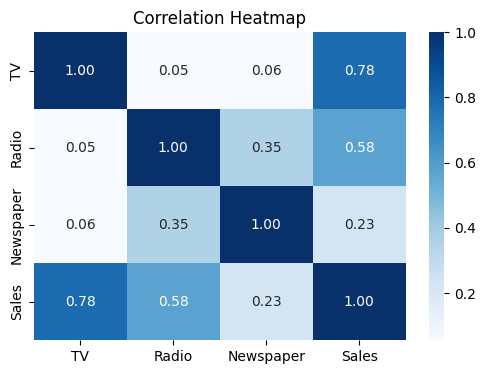

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import os
import openai

# Load API key from environment variable
openai.api_key = os.getenv("OPENAI_API_KEY")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Split into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Step 2: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Step 6: Coefficients (importance of each channel)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nChannel Importance:")
print(coefficients)


Model Performance:
R² Score: 0.90
RMSE: 1.78

Channel Importance:
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


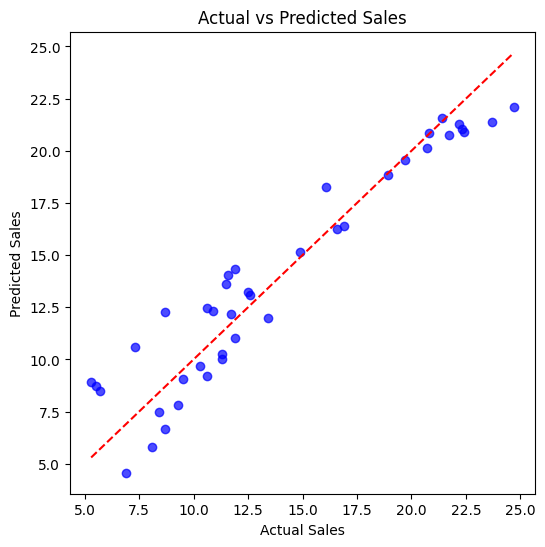

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


/tmp/ipython-input-2349581942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.index, y=coef.values, palette="viridis")


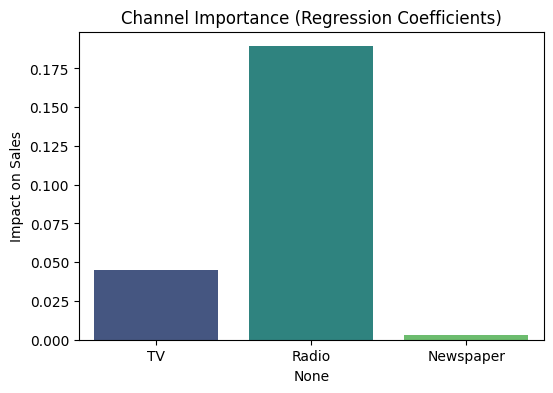

In [ ]:
import seaborn as sns

# Coefficients
coef = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(6,4))
sns.barplot(x=coef.index, y=coef.values, palette="viridis")
plt.title("Channel Importance (Regression Coefficients)")
plt.ylabel("Impact on Sales")
plt.show()


In [ ]:
analysis_prompt = f"""
You are a marketing data analyst. Write a short, recruiter-friendly summary
of the ad budget analysis based on these results:

R² = {r2:.2f}, RMSE = {rmse:.2f}
Coefficients (impact per $): {coef.to_dict()}
Correlations: {data.corr().to_dict()}

Write it in 3-4 simple bullet points.
Keep it business-focused, like advice for a marketing manager.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": analysis_prompt}]
)

print("💡 GenAI Insights:\n")
print(response.choices[0].message.content)

💡 GenAI Insights:

- **High Predictive Power:** The model shows a strong R² value of 0.90, indicating that 90% of the variability in sales can be explained by the advertising budget, providing confidence in the results.

- **Effective Channels:** Radio yields the highest impact per dollar spent ($0.19), followed by TV ($0.044), suggesting a strategic focus on radio advertising could enhance sales outcomes significantly. Newspaper advertising has minimal impact ($0.003), warranting a reconsideration of budget allocation.

- **Correlation Insights:** Strong correlation with sales is observed for TV (0.78) and moderate for Radio (0.58); thus, while TV remains essential, enhancing radio advertising is likely to drive greater results.

- **Strategic Recommendations:** Allocate resources towards radio advertising while reassessing the effectiveness of newspaper spend to optimize overall marketing ROI.


In [ ]:
# === Power BI export pack (one-and-done) ===
import pandas as pd
import numpy as np

# 1) Main table with predictions & residuals
data_export = data.copy().reset_index(drop=True)
data_export["Predicted"] = model.predict(data_export[["TV","Radio","Newspaper"]])
data_export["Residual"]  = data_export["Sales"] - data_export["Predicted"]
data_export.insert(0, "ID", range(1, len(data_export)+1))

# 2) Model metrics (R2, RMSE)
metrics_df = pd.DataFrame({
    "Metric": ["R2", "RMSE"],
    "Value":  [r2, rmse]
})

# 3) Coefficients table
coeff_df = pd.DataFrame({
    "Channel": ["TV","Radio","Newspaper"],
    "Coefficient": list(model.coef_)
})

# 4) (Optional) Correlations
corr = data.corr(numeric_only=True)["Sales"].drop("Sales")
corr_df = corr.reset_index().rename(columns={"index":"Channel","Sales":"Correlation"})

# 5) Save CSVs for Power BI
data_export.to_csv("/content/cleaned_ads_with_preds.csv", index=False)
metrics_df.to_csv("/content/model_metrics.csv", index=False)
coeff_df.to_csv("/content/coefficients.csv", index=False)
corr_df.to_csv("/content/correlations.csv", index=False)

print("Saved 4 files:\n- cleaned_ads_with_preds.csv\n- model_metrics.csv\n- coefficients.csv\n- correlations.csv")
print("Download them from the left Files pane in Colab (three dots > Download).")


Saved 4 files:
- cleaned_ads_with_preds.csv
- model_metrics.csv
- coefficients.csv
- correlations.csv
Download them from the left Files pane in Colab (three dots > Download).


In [ ]:
from google.colab import files

# Download all 4 files
files.download("cleaned_ads_with_preds.csv")
files.download("model_metrics.csv")
files.download("coefficients.csv")
files.download("correlations.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>